In [1]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    import numpy as np
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import matplotlib.pyplot as plt


In [2]:
s=200 #Shape of our image
trainGen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_set=trainGen.flow_from_directory('data/test',target_size=(s,s),color_mode='rgb',batch_size=15, class_mode='categorical')

Found 7000 images belonging to 2 classes.


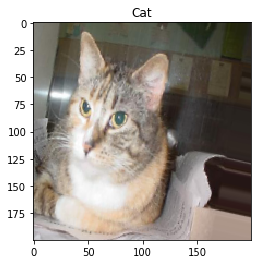

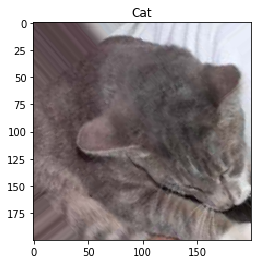

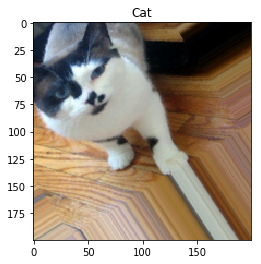

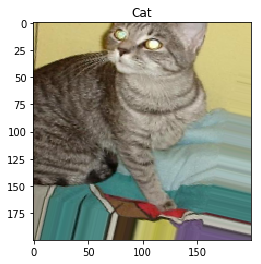

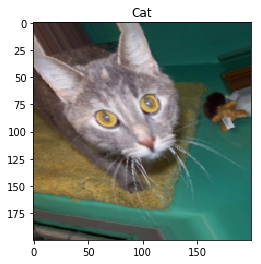

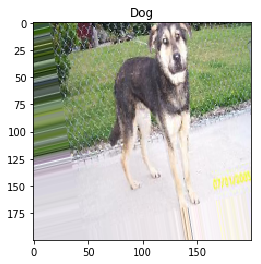

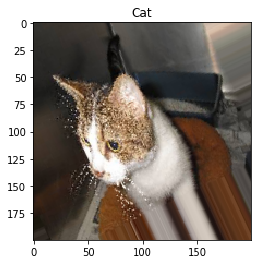

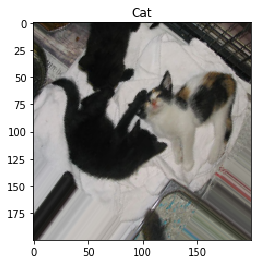

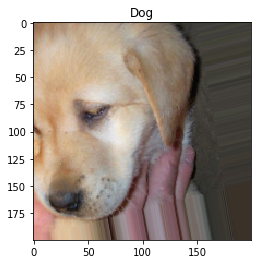

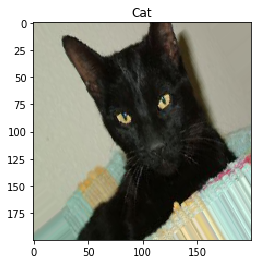

In [3]:
classes=['Cat','Dog']
for i in range(10):
    plt.imshow(train_set[0][0][i])
    label=train_set[0][1][i]
    plt.title(classes[np.argmax(label)])
    plt.show()

In [4]:
from tensorflow.keras.layers import Conv2D, Dense,Dropout,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
model=Sequential()

In [5]:
model.add(Conv2D(25,(3,3),input_shape=(s,s,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 25)      700       
_________________________________________________________________
flatten (Flatten)            (None, 1000000)           0         
_________________________________________________________________
dense (Dense)                (None, 10)                10000010  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 10,000,732
Trainable params: 10,000,732
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile('sgd','categorical_crossentropy',metrics=['acc'])

In [7]:
model.fit_generator(train_set,steps_per_epoch=10,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
  2/467 [..............................] - ETA: 6:06 - loss: 1.7738 - acc: 0.5000

OSError: cannot identify image file 'data/test\\Dog\\11702.jpg'

In [ ]:

evaluateGen=ImageDataGenerator(rescale=1./255)

evaluate_set=evaluateGen.flow_from_directory('data/valid',target_size=(s,s),color_mode='rgb',batch_size=2, class_mode='categorical')

In [ ]:
score=model.evaluate_generator(evaluate_set,steps=1)

In [ ]:
score

In [ ]:
testGen=ImageDataGenerator(rescale=1./255)
test_set=testGen.flow_from_directory('data/test',target_size=(s,s),color_mode='rgb',batch_size=2, class_mode='categorical')

In [ ]:
for i in range(2):
    plt.imshow(test_set[0][0][i])
    label=test_set[0][1][i]
    image=test_set[0][0][i]
    image=image.reshape(1,s,s,3)
    prediction=model.predict(image)
    plt.title(f"real:{classes[np.argmax(label)]} prediction:{classes[np.argmax(prediction)]}")
    plt.show()

In [ ]:
import cv2

camera = cv2.VideoCapture(0)
for i in range(1):
    return_value, image = camera.read()
    cv2.imwrite('RealTimeData/human/'+str(i)+'.jpg', image)
    
del(camera)

In [ ]:
realtestGen=ImageDataGenerator(rescale=1./255)
realtest_set=testGen.flow_from_directory('RealTimeData/',target_size=(s,s),color_mode='rgb',batch_size=2, class_mode='categorical')

In [ ]:

for i in range(1):
    plt.imshow(realtest_set[0][0][i])
    label=realtest_set[0][1][i]
    image=realtest_set[0][0][i]
    image=image.reshape(1,s,s,3)
    prediction=model.predict(image)
    plt.title(f"real:{'You'} prediction:{classes[np.argmax(prediction)]}")
    plt.show()